In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [44]:
df = pd.read_csv('drug2.csv')
print(df.head())
x = df.iloc[:,0:2]
y = df.iloc[:,2]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.6)


# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
print(model.summary())



   sex  dose  response
0    1   0.1     13.75
1    1   0.2     12.90
2    1   0.3     19.26
3    1   0.4     20.34
4    1   0.5     19.97
                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     4004.
Date:                Wed, 13 Feb 2019   Prob (F-statistic):               0.00
Time:                        00:44:05   Log-Likelihood:                -6645.6
No. Observations:                1280   AIC:                         1.330e+04
Df Residuals:                    1278   BIC:                         1.331e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

In [48]:
d = {'Real Value':y_test,'Predicted Value':predictions.tolist(),'Error':np.subtract(y_test,predictions.tolist())}
Pred = pd.DataFrame(data=d)
print(Pred.head(20))

      Real Value  Predicted Value      Error
2068      195.64       159.681206  35.958794
591        32.84        78.072275 -45.232275
1164       25.37        55.159760 -29.789760
2908       11.44         7.637505   3.802495
557        21.85        49.219478 -27.369478
1512        3.98        11.031952  -7.051952
2930       15.06        26.306962 -11.246962
2711        5.04        10.183340  -5.143340
599        35.13        84.861169 -49.731169
67        194.96       158.832594  36.127406
1289      257.40       177.502051  79.897949
1943       15.91        37.338914 -21.428914
2244      128.09       139.314525 -11.224525
2584       27.34        72.131994 -44.791994
2884      242.05       173.258993  68.791007
1287      250.00       175.804828  74.195172
1637      113.40       133.374243 -19.974243
1210       40.08       110.461728 -70.381728
1662      176.90       154.589535  22.310465
885       237.90       174.107604  63.792396


(array([201., 156., 181., 139., 147., 143., 148., 155., 132., 115.,  59.,
         46.,  60.,  39.,  50.,  53.,  51.,  45.]),
 array([4.10281754e-02, 5.30218394e+00, 1.05633397e+01, 1.58244955e+01,
        2.10856513e+01, 2.63468070e+01, 3.16079628e+01, 3.68691186e+01,
        4.21302743e+01, 4.73914301e+01, 5.26525859e+01, 5.79137416e+01,
        6.31748974e+01, 6.84360532e+01, 7.36972089e+01, 7.89583647e+01,
        8.42195205e+01, 8.94806763e+01, 9.47418320e+01]),
 <a list of 18 Patch objects>)

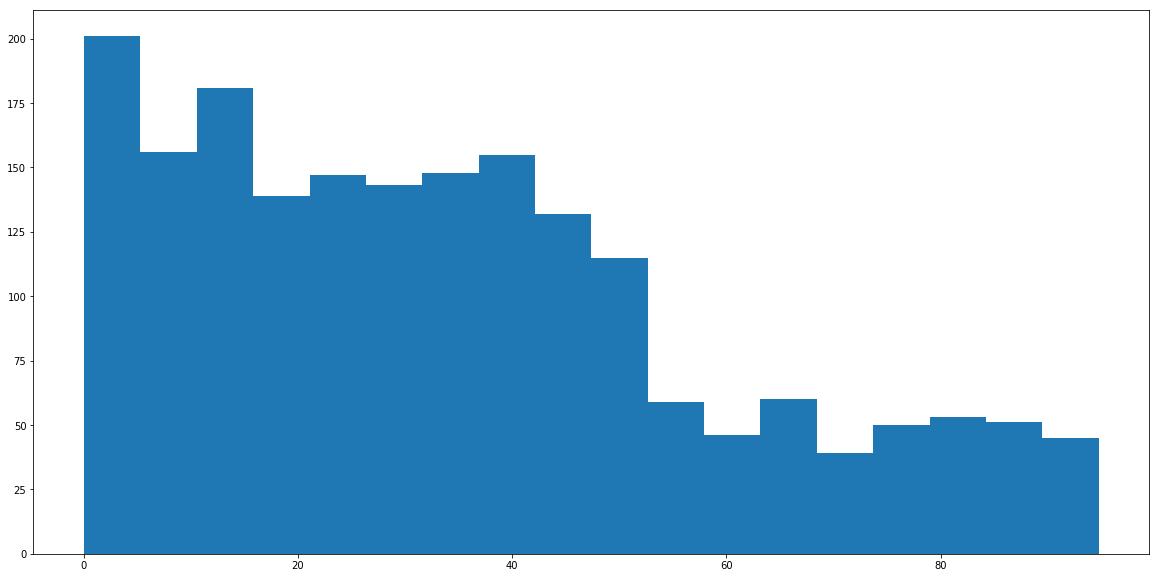

In [74]:
#Gaussian Plot to check error distribution
error = Pred.Error.tolist()
error = [abs(error[i]) for i in range(len(Pred))]
plt.figure(figsize=(20,10))
plt.hist(error,bins='auto')

35.9587943919895

Other Exmaple

In [32]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])


X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']


# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1798.403977625855
Coefficients: 
 [ 345.54008701 -250.14657137]
Predicted Stock Index Price: 
 [1422.86238865]
                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Wed, 13 Feb 2019   Prob (F-statistic):           4.04e-11
Time:                        00:36:49   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]


In [41]:
print((y_train))
print(X_train)

734      13.54
2288    253.15
1171     28.38
2579     30.62
146      20.83
833     104.09
1194     31.12
416      56.90
1590     32.62
982      28.36
1398     34.45
2195     36.46
830      93.04
1610     38.51
2250    149.36
2541     15.99
1790     34.93
811      44.25
342      17.05
1447    140.81
1420     70.23
567      23.83
120      12.61
2247    139.01
1031     92.44
1511      4.66
2963     26.90
1845    136.42
1236    108.56
2464    185.59
         ...  
1917     10.66
1846    137.83
998      34.42
487     251.84
339      17.64
1073    211.36
650     147.22
1377     28.10
1044    127.74
3024     76.33
2265    188.20
289     255.63
628      90.18
17       58.53
2908     11.44
3105      5.24
2527     11.78
1814     44.62
180      27.52
1325     11.50
717      11.76
311       5.87
2356     19.43
2481    231.48
1942     20.25
495     271.35
1841    122.02
474     211.11
524       9.12
642     129.39
Name: response, Length: 1280, dtype: float64
      sex  dose
734     0   3.5
2288    